In [ ]:
!pip install torch torchvision

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import os

In [ ]:
image_size =28*28
hidden_size = 256
latent_size = 64
batch_size = 100
lr = 0.0002
num_epochs = 100

Defining generator with activation function

In [ ]:
class Generator(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(Generator,self).__init__()
    self.model=nn.Sequential(
        nn.Linear(input_size,hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size,hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size,output_size),
        nn.Tanh()
    )
  def forward(self,x):
    return self.model(x)

    #define discriminator model
class Discriminator(nn.Module):
  def __init__(self,input_size, hidden_size):
    super(Discriminator,self).__init__()
    self.model=nn.Sequential(
        nn.Linear(input_size,hidden_size),
        nn.LeakyReLU(0.2),
        nn.Linear(hidden_size,hidden_size),
        nn.LeakyReLU(0.2),
        nn.Linear(hidden_size,1),

        nn.Sigmoid()
    )
  def forward(self,x):
    return self.model(x)

In [ ]:
#Transform to normalize the MNIST images (-1,1) and convert to tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5))
])
#Load MNIST dataset
mnist=torchvision.datasets.MNIST(root='./data',train=True,transform=transform,download=True)
#Create data loader
dataloader = torch.utils.data.DataLoader(mnist,batch_size=batch_size,shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 14793441.98it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 430643.44it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4159369.25it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4267591.57it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
#Initialize generator and discriminator models
generator = Generator(latent_size,hidden_size,image_size)
discriminator = Discriminator(image_size,hidden_size)

#Loss and Optimizer
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(),lr=lr)
optimizer_d = optim.Adam(discriminator.parameters(),lr=lr)

In [ ]:
#a function to denormalise image
def denorm(x):
  return(x+1)/2
  #make directory for saving generated images
os.makedirs('gan_images',exist_ok=True)
  #trainig loop
for epoch in range(num_epochs):
  for i,(images,_) in enumerate(dataloader):
    #flatten the images
    images=images.view(batch_size,-1)
    #create real and fake labels
    real_labels=torch.ones(batch_size,1)
    fake_labels=torch.zeros(batch_size,1)

    #compute BCE_Loss using real images
    outputs=discriminator(images)
    d_loss_real=criterion(outputs,real_labels)
    real_score=outputs

    #generate fake images
    z=torch.randn(batch_size,latent_size)
    fake_images=generator(z)
    #compute BCE_LOSS FAKE
    outputs=discriminator(fake_images.detach())
    d_loss_fake=criterion(outputs,fake_labels)
    fake_score=outputs
    #Backpropand optimize
    d_loss=d_loss_real+d_loss_fake
    optimizer_d.zero_grad()
    d_loss.backward()
    optimizer_d.step()

    #Train the Generator
    z=torch.randn(batch_size,latent_size)
    fake_images=generator(z)

    #compute loss with flipped labels
    outputs=discriminator(fake_images)
    g_loss=criterion(outputs,real_labels)

    #backprop and optimize
    optimizer_g.zero_grad()
    g_loss.backward()
    optimizer_g.step()
    if(i+1)%200==0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], D loss: {d_loss.item():.4f}, G loss: {g_loss.item():.4f}')
#save real and fake
if(epoch+1) % 10 == 0:
  fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
  save_image(denorm(fake_images), os.path.join('gan_images', f'fake_images-{epoch+1}.png'))

Epoch [1/100], Step [200/600], D loss: 0.0048, G loss: 5.5480
Epoch [1/100], Step [400/600], D loss: 0.0002, G loss: 13.0685
Epoch [1/100], Step [600/600], D loss: 0.0008, G loss: 10.0252
Epoch [2/100], Step [200/600], D loss: 0.0056, G loss: 9.2475
Epoch [2/100], Step [400/600], D loss: 0.0035, G loss: 9.6364
Epoch [2/100], Step [600/600], D loss: 0.0352, G loss: 6.4164
Epoch [3/100], Step [200/600], D loss: 0.1086, G loss: 6.9022
Epoch [3/100], Step [400/600], D loss: 0.2516, G loss: 4.7351
Epoch [3/100], Step [600/600], D loss: 0.2797, G loss: 4.8530
Epoch [4/100], Step [200/600], D loss: 0.1389, G loss: 4.0884
Epoch [4/100], Step [400/600], D loss: 0.0896, G loss: 5.6950
Epoch [4/100], Step [600/600], D loss: 0.1673, G loss: 5.6317
Epoch [5/100], Step [200/600], D loss: 0.1934, G loss: 4.7645
Epoch [5/100], Step [400/600], D loss: 0.1513, G loss: 4.9810
Epoch [5/100], Step [600/600], D loss: 0.1846, G loss: 5.0141
Epoch [6/100], Step [200/600], D loss: 0.1391, G loss: 6.8596
Epoch 

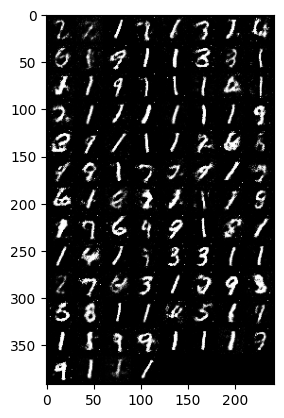

In [ ]:
# View generated images from epoch 100
import matplotlib.image as mpimg

# Load and display an example image
img = mpimg.imread('gan_images/fake_images-100.png')
imgplot = plt.imshow(img)
plt.show()